# Case Study: McDonald’s Customer Preference Analysis

## 1. Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better plots
sns.set(style="whitegrid")
%matplotlib inline


## 2. Load the Dataset

In [3]:
df = pd.read_excel("mcdonalds(1).csv.xlsx", sheet_name="mcdonalds(1)")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


## 3. Data Summary

In [4]:
df.shape    # Display the first few rows of the dataset

(1453, 15)

In [5]:
df.info()   # Display the data types and non-null counts of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
df.describe()  # Display summary statistics for numerical columns

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [7]:
df.isnull().sum()      # Check for nulls

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

🧠 Insight:

No missing data.

Like is numerical, others are Yes/No (categorical).

Age varies widely.

##  4. Data Cleaning

In [8]:
binary_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
               'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))


## 5. Univariate Analysis

#### ➤ Gender Distribution

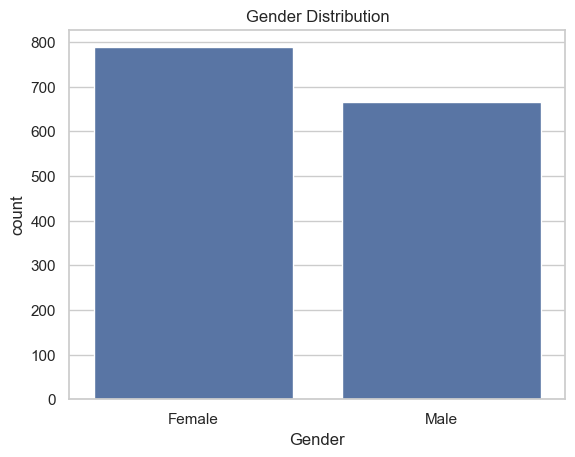

In [9]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


#### Insight: Shows male vs female participation.

#### ➤ Age Distribution

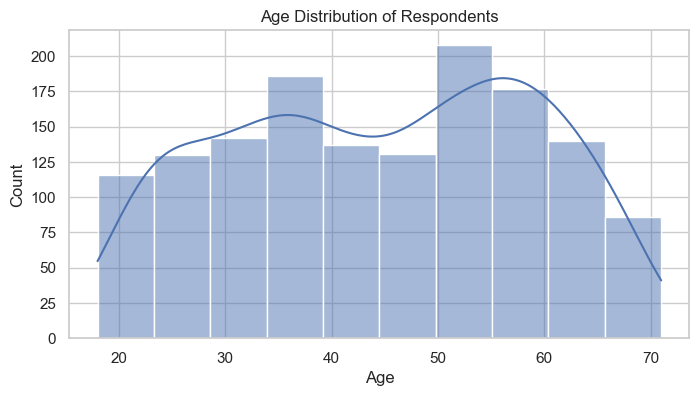

In [10]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True, bins=10)
plt.title("Age Distribution of Respondents")
plt.xlabel("Age")
plt.show()


#### Insight: Most respondents are between 40–70 years.

#### ➤ McDonald’s Likeability

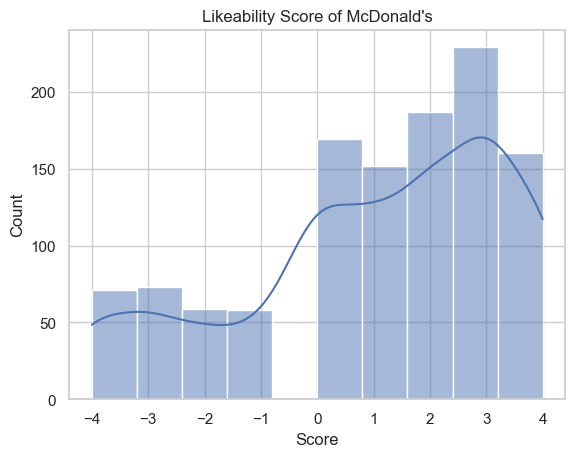

In [ ]:
# Remove non-numeric values
df_clean = pd.to_numeric(df['Like'], errors='coerce')
# Drop NaN values (jo convert nahi ho paaye)
df_clean = df_clean.dropna()

# Plot
sns.histplot(df_clean, kde=True, bins=10)
plt.title("Likeability Score of McDonald's")
plt.xlabel("Score")
plt.show()



#### Insight: Score ranges from -4 (dislike) to +4 (strongly like). Majority are neutral or positive.

## 6. Bivariate Analysis

#### ➤ Do people who find food yummy also like McDonald’s?

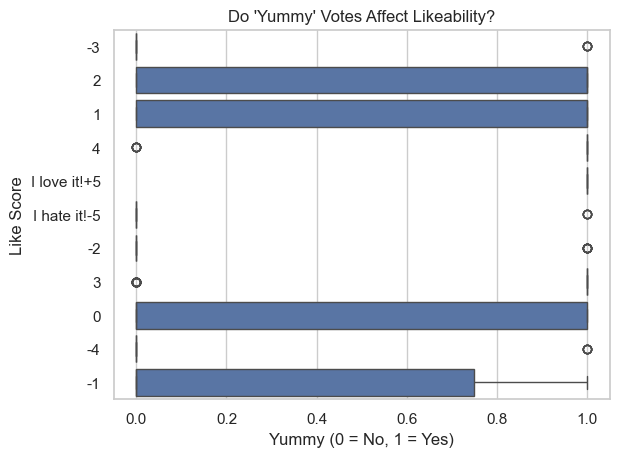

In [13]:
sns.boxplot(x='yummy', y='Like', data=df)
plt.title("Do 'Yummy' Votes Affect Likeability?")
plt.xlabel("Yummy (0 = No, 1 = Yes)")
plt.ylabel("Like Score")
plt.show()


#### Insight: People who say food is “Yummy” give much higher scores to McDonald’s.

#### ➤ Gender-wise Likeability

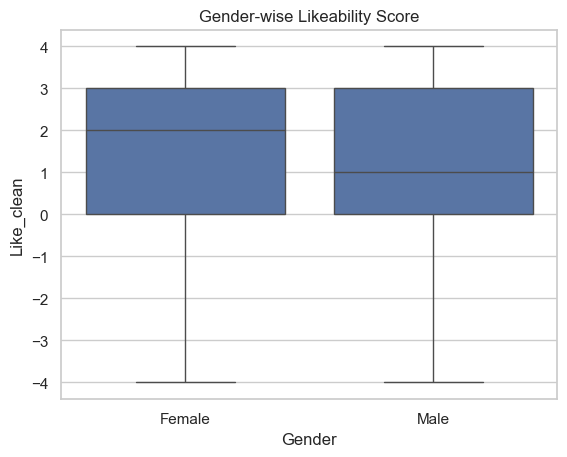

In [15]:
# Pehle 'Like' column ko clean karo
df['Like_clean'] = pd.to_numeric(df['Like'], errors='coerce')  # Strings will become NaN

# NaN wale rows hata do
df_clean = df.dropna(subset=['Like_clean'])
# Boxplot lagao clean column pe
sns.boxplot(x='Gender', y='Like_clean', data=df_clean)
plt.title("Gender-wise Likeability Score")
plt.show()



#### Insight: Both genders show similar average liking.



## 7. Visit Frequency vs Like

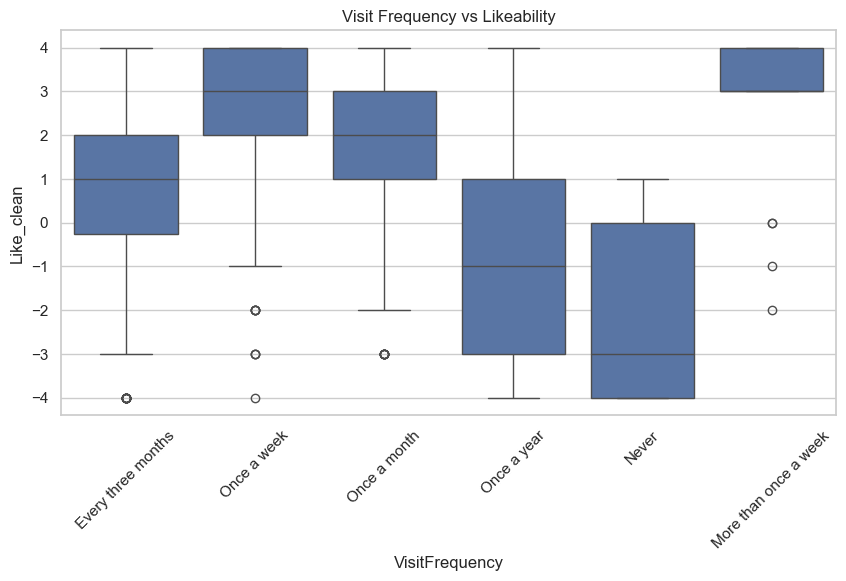

In [17]:
# Clean the 'Like' column and create new numeric column
df['Like_clean'] = pd.to_numeric(df['Like'], errors='coerce')
# Drop rows where 'Like_clean' is NaN
df_clean = df.dropna(subset=['Like_clean'])
# Now plot boxplot safely
plt.figure(figsize=(10, 5))
sns.boxplot(x='VisitFrequency', y='Like_clean', data=df_clean)
plt.title("Visit Frequency vs Likeability")
plt.xticks(rotation=45)
plt.show()



#### Insight: People who visit once a week or daily have higher like scores.

##  8. Correlation Heatmap

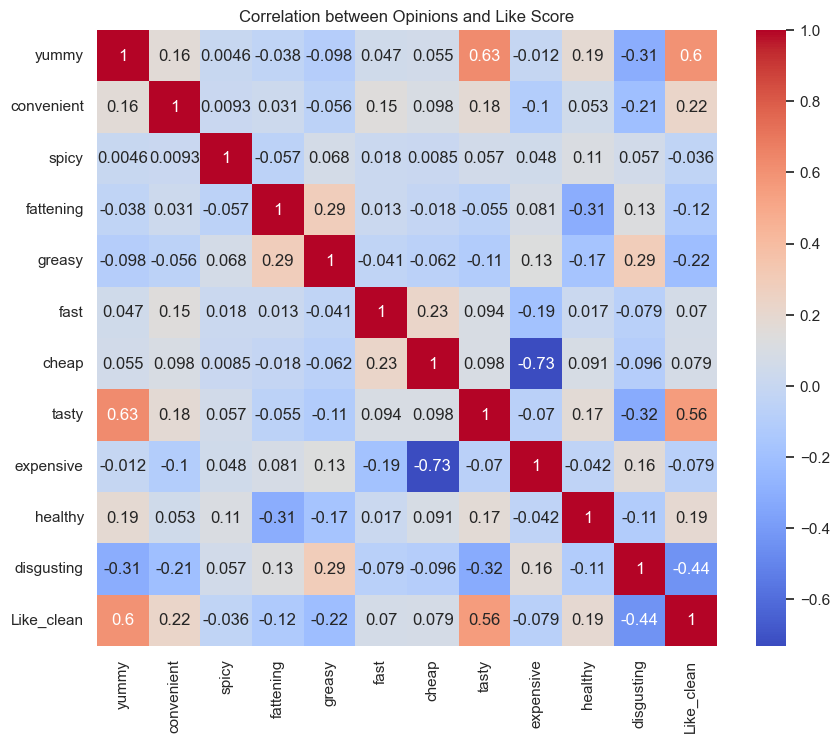

In [19]:
# Make sure 'Like_clean' exists
df['Like_clean'] = pd.to_numeric(df['Like'], errors='coerce')

# Drop NaNs for correlation
df_corr = df[binary_cols + ['Like_clean']].dropna()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Opinions and Like Score")
plt.show()



Insight:
Positive correlations: yummy, tasty, cheap, fast
Negative: disgusting, expensive